In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'

**t-SNE**

(t-distributed stochastic neighbor embedding)

C помощью t-SNE можно снижать размерность данных, что позволяет визуализировать многомерные данные в 2D или 3D графике.

Если объекты в выборке имеют большое количество признаков, то можно получить представление о них, преобразовав данные с помощью алгоритма t-SNE.

В частности, можно увидеть возможность разделения объектов на кластеры, определить подходящее их число, а также получить представление о качестве разбиения на кластеры.

In [2]:
from sklearn.manifold import TSNE

Загркзим данные о недвижимости

In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
california = fetch_california_housing()

In [6]:
for line in california.DESCR.split('\n'):
    print(line)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
data = california.data

In [8]:
feature_names = california.feature_names

In [9]:
X = pd.DataFrame(data, columns=feature_names)

In [10]:
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [12]:
price = california.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.3, random_state=7)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 8), (6192, 8), (14448,), (6192,))

Масштабирование признаков

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)

In [18]:
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [20]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

Применение t-SNE

In [21]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

In [22]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [23]:
X_train_tsne

array([[-38.09521 ,  62.74076 ],
       [-44.293167, -24.222351],
       [-17.715818, -39.1273  ],
       ...,
       [-34.958042, -35.48486 ],
       [ 30.611858,  58.594025],
       [ 38.74459 , -22.555155]], dtype=float32)

In [24]:
X_train_tsne.shape

(14448, 2)

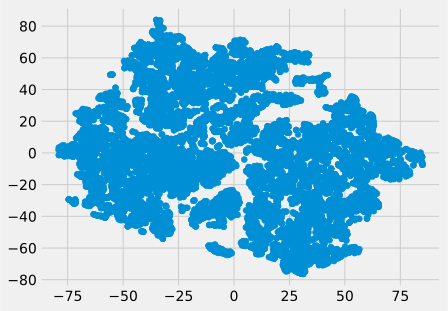

In [26]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

Разобьем данные на 2 кластера

In [27]:
from sklearn.cluster import KMeans

In [28]:
kmeans = KMeans(n_clusters=2)

In [29]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [30]:
pd.value_counts(labels_train)

/var/folders/4m/n9xjjgns0d3g3fv4nnp_9zz40000gn/T/ipykernel_38732/3600805602.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(labels_train)


0    8366
1    6082
Name: count, dtype: int64

In [31]:
labels_test = kmeans.predict(X_test_scaled)

График t-SNE с известными лейблами

In [35]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-75, 80, 'Кластер 0')
plt.text(75, -60, 'Кластер 1')
plt.show()

Посмотрим на данные, расположенные в разных кластерах

In [36]:
y_train.mean()

np.float64(2.06060179748062)

In [38]:
y_train[labels_train==0].mean()

np.float64(2.1304071718862065)

In [39]:
y_train[labels_train==1].mean()

np.float64(1.964582106215061)

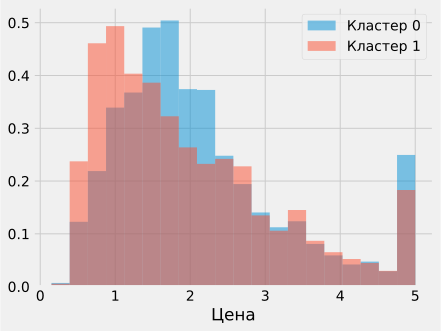

In [ ]:
plt.hist(y_train[labels_train==0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train==1], bins=20, density=True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('Цена')
plt.show()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [46]:
X

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

In [47]:
X_train.loc[labels_train==0, 'AveRooms'].mean()

np.float64(5.206129471004081)

In [48]:
X_train.loc[labels_train==1, 'AveRooms'].mean()

np.float64(5.75021191333867)

In [53]:
X_train.loc[labels_train==0, 'Population'].mean()

np.float64(1546.8137700215157)

In [54]:
X_train.loc[labels_train==1, 'Population'].mean()

np.float64(1266.072344623479)

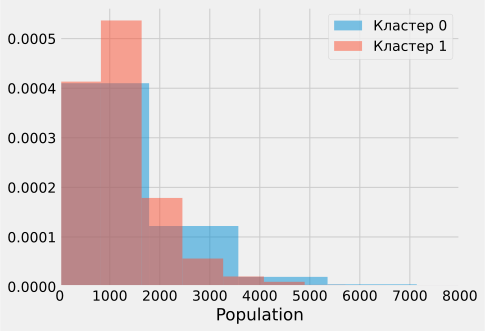

In [57]:
plt.hist(X_train.loc[labels_train==0, 'Population'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train==1, 'Population'], bins=20, density=True, alpha=0.5)
plt.xlim(0, 8000)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('Population')
plt.show()

**Использование информации, полученной с помощью t-SNE в моделях**

Базовая модель предсказания цены на недвижимость (до разделения на кластеры)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [61]:
y_test_pred = lr.predict(X_test_scaled)

In [62]:
from sklearn.metrics import r2_score

In [63]:
r2_score(y_test, y_test_pred)

0.6099020228784564

Две модели, построенные на объектах из разных кластеров

In [64]:
# 1я модель - на объектах из Кластера 0
lr.fit(X_train_scaled.loc[labels_train==0, :], y_train[labels_train==0])

y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test==0, :])

r2_score(y_test[labels_test==0], y_test_pred_0)

0.5674422484611998

In [65]:
# 2я модель - на объектах из Кластера 0
lr.fit(X_train_scaled.loc[labels_train==1, :], y_train[labels_train==1])

y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test==1, :])

r2_score(y_test[labels_test==1], y_test_pred_1)

0.6767424611235329

In [68]:
# Объединение известных правильных ответов по объектам из двух кластеров
y_test_all = np.hstack([y_test[labels_test==0], y_test[labels_test==1]])

In [69]:
# Объединение предсказанных ответов по объектам из двух кластеров
y_test_pred_all = np.hstack([y_test_pred_0, y_test_pred_1])

In [70]:
# R2 по всем объектам тестовой выборки
r2_score(y_test_all, y_test_pred_all)

0.6176130106420509